# Dielectric Function


The permitivity (dielectric function) describes the elecrtic and optic properties of a (non-magnetic) material completely.

$$ \varepsilon = 1+ \frac{4 \pi i \sigma}{\omega}$$

with $\omega$ frequency and $\sigma$ conductivity (however not for dc currents ($\omega = 0).

$$ n^2 - \kappa^2 = \Re(\varepsilon); \ \ \  2n \kappa = \Im(\varepsilon)$$

with $n+i\kappa$ being the complete index of refraction.

The permittivity in turn is dependent on inteband trasnition, absorption edges and resonan dipole excitations.


# Dispersion


From the Fourier representation of the Maxwell equations in the source free case, we get:
$$\frac{\epsilon_i \mu_i}{c^2} = k^2$$

which we transform into:

$$k = \frac{\omega}{c} \sqrt{\varepsilon_1 \mu}$$

which gives for non-magnetic materials:

$$k = \frac{\omega}{c} \sqrt{\varepsilon_1 }$$

for $\varepsilon_1 > 0$ the wavenumber $k$ is a real function of real $\omega$.

while for $\varepsilon_1 < 0$ the wavenumber $k$ is purely imaginary.


for light  in vacuum the permittivity $\varepsilon_1$ is a constant with value 1 and we get the equation for light line:

$$k = \frac{\omega}{c}$$





# Permittivity

The permittivity is a complex function, where the imaginary part as usual dicribes dissipation of energy

# Longitudinal Waves

# Drude-Lorentz

The real and imaginary part of dielectric function or permittivity of the metals is important to simulate the optical properties of metal films and nanoparticles. Permittivity data is obtained experimentally by ellipsometry and is fitted with analytical models. The most common model for fitting experimental data is with Drude-Lorentz model shown below. 

$$\epsilon(\omega)=1-\frac{f_0\omega_p^2}{(\omega^2+i\Gamma_0\omega)}+\sum_{j=1}^{n}\frac{f_j\omega_p^2}{(\omega_{o,j}^2-\omega^2-i\Gamma_j\omega)}$$

The first term is the Drude part. It represents the response of electron in the Fermi sea/conduction band when it sees external oscillating electric field (these transitions are called as intraband transitions). The Drude term has the plasma frequency ($\\omega_p$, oscillator strengh ($f_0$) and damping term ($\Gamma_0$). 

The rest of the terms represent the Lorentz oscillators with specific resonance frequencies ($\omega_{o,j}$), oscillator strengths ($f_{j}$) and damping terms($\Gamma_j$) associated with them. They represent electron excitation from one band to another following an external oscillating electric field at certain resonance frequencies (these transitions are called as interband transitions).



In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook

Populating the interactive namespace from numpy and matplotlib


## Parameters from Raman

Raman data are parametrized in terms of the Drude-Lorentz model.

Here we plot the one of Gold

In [5]:

def drude_lorentz_model(tags, w):
    '''
    This is functional representation of drude lorentz model with the first term being Drude
    and the rest terms being lorentz oscillators
    '''
    
    # Get the plasma frequency
    omega_p = tags['Omega_p']
   

    epsilon = 1. 
    for i in range(len(tags['f'])):
        # i==0 is Drude term whith omega[i] = 0 so that's where the "-" sign went
        # i>0 are the Lorentz terms and represent interband transitions
        epsilon = epsilon + (tags['f'][i] * omega_p**2 / (tags['Omega'][i]**2 - w**2 - 1j * tags['Gamma'][i] * w))

     
    return epsilon

tags = {}
                                                            
tags['name'] ='Gold'
tags['Omega_p'] = 9.97441670
tags['f'] =     np.array([0.068683341, 0.98709783, 0.07682351, 0.16124225, 0.15690286, 0.23132574])
tags['Gamma'] = np.array([0.01987236, 1.4876e-05, 0.65934600, 1.12448236, 1.18873234, 1.88224399])
tags['Omega'] = np.array([0.         , 8.02150038, 2.91927926, 3.70495567, 4.50000000, 5.71650394])

ep = drude_lorentz_model(tags, np.linspace(1,1000)/50)                                                            

## Plotting of the permittivity 

the Plot of the permittivity shows that these data are only accurate in the visible light range.

<IPython.core.display.Javascript object>


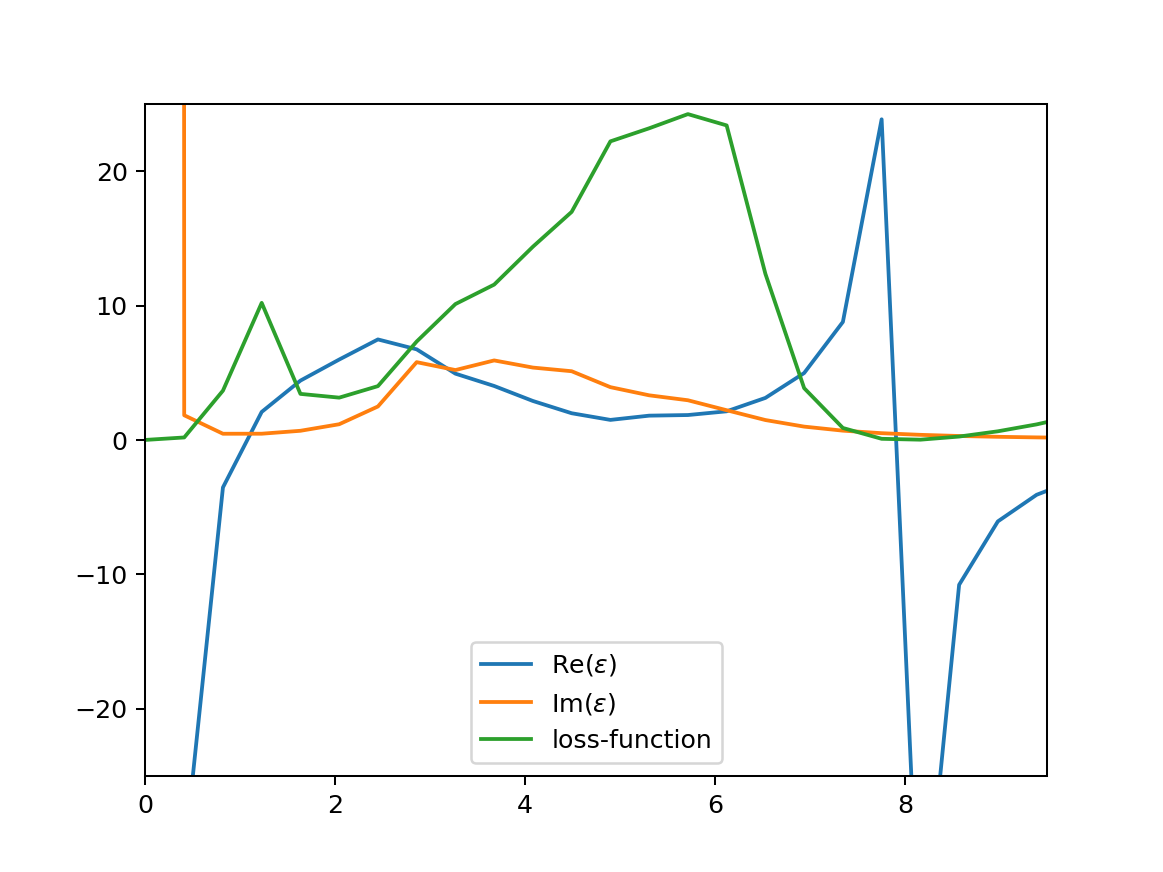

In [6]:
plt.figure()
plt.plot(np.linspace(0,1000)/50,ep.real, label ='Re($\epsilon$)')
plt.plot(np.linspace(0,1000)/50,ep.imag, label ='Im($\epsilon$)');
plt.plot(np.linspace(0,1000)/50,(-1./ep).imag*100.,label='loss-function')
plt.xlim(0,9.5)
plt.ylim(-25,25)
plt.legend();